In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
df_col2014 = pd.read_excel("2014collisionsfinal.xls")
df_col2015 = pd.read_excel("2015collisionsfinal.xls")
df_col2016 = pd.read_excel("2016collisionsfinal.xls")
df_col2 = df_col2016.append(df_col2014, ignore_index=True)
df_col = df_col2.append(df_col2015, ignore_index=True)

In [41]:
df_col.head()

,Record,Location,X,Y,Date,Time,Environment,Road_Surface,Traffic_Control,Collision_Location,Light,Collision_Classification,Impact_type,env_code,rdsurf_code,tfctl_code,colloc_code,light_code,colclass_code,imptyp_code
0,1,105 S OF COMMISSIONER ST @ ALBERT ST,366666.27470,5.030879e+06,2016-08-04,17:03:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,01 - Daylight,03 - P.D. only,04 - Sideswipe,01,01,01,02,01,02,04
1,2,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365431.43901,5.021830e+06,2016-03-30,15:44:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,02 - Non-fatal injury,05 - Turning movement,01,01,01,03,01,02,05
2,3,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365432.23417,5.021830e+06,2016-09-02,16:02:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,03 - P.D. only,05 - Turning movement,01,01,01,03,01,02,05
3,4,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365430.72652,5.021830e+06,2016-03-12,17:30:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,03 - P.D. only,05 - Turning movement,01,01,01,03,01,02,05
4,5,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365430.66577,5.021831e+06,2016-08-23,15:52:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,01 - Daylight,03 - P.D. only,03 - Rear end,01,01,01,02,01,02,03


(4985000, 5050000)

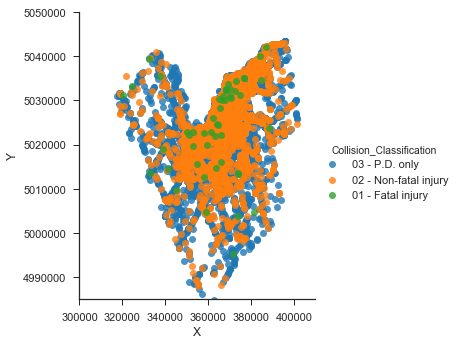

In [8]:
#creating a scatter plot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

plt.figure.set_size_inches=(12,12)
# Create scatterplot of dataframe
sns.lmplot('X', # Horizontal axis
           'Y', # Vertical axis
           data=df_col, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='Collision_Classification')

#overview of all intersections
plt.xlim(300000,410000)
plt.ylim(4985000,5050000)

#removing far outlying intersections
#plt.xlim(340000,380000)
#plt.ylim(5017000,5040000)

#trying to get a scope on downtown
#plt.xlim(360000,375000)
#plt.ylim(5024000,5035000)


In [12]:
#df_col.groupby(['Location']).Location.value_counts().nlargest(10)
df_col.Location.value_counts().nlargest(20)

ST. JOSEPH BLVD @ JEANNE D'ARC BLVD                           119
HUNT CLUB RD @ RIVERSIDE DR                                    83
WEST HUNT CLUB RD @ WOODROFFE AVE                              77
PRINCE OF WALES DR @ WEST HUNT CLUB RD                         73
BASELINE RD @ WOODROFFE AVE                                    68
HIGHWAY 417 btwn HWY417 IC117 RAMP51 & HWY417 IC117 RAMP35     67
HIGHWAY 417 btwn HWY417 IC126 RAMP61 & HWY417 IC124 RAMP76     67
INNES RD @ TENTH LINE RD                                       61
FALLOWFIELD RD @ GREENBANK RD                                  61
HIGHWAY 417 btwn HWY417 IC118 RAMP35 & HWY417 IC117 RAMP51     59
HIGHWAY 417 btwn HWY417 IC118 RAMP57 & HWY417 IC118 RAMP35     59
MONTREAL RD @ VANIER PKWY                                      59
HAWTHORNE RD @ HUNT CLUB RD                                    56
TERRY FOX DR @ PALLADIUM DR/KATIMAVIK RD                       54
MEADOWLANDS DR @ MERIVALE RD                                   53
INDUSTRIAL

In [237]:
#creating a scatter plot with the top 20 collision locations highlighted
#create series with top 20 locations
df_top20 = df_col.Location.value_counts().nlargest(20)
dfcol20 = df_top20.to_frame()
dfcol20.describe()

,Location
count,20.000000
mean,96.650000
std,23.457184
min,78.000000
25%,83.000000
50%,88.000000
75%,99.250000
max,173.000000


In [238]:
dfcol20.drop(['Location'], axis=1, inplace=True)
dfcol20

""
ST. JOSEPH BLVD @ JEANNE D'ARC BLVD
HUNT CLUB RD @ RIVERSIDE DR
INNES RD @ TENTH LINE RD
PRINCE OF WALES DR @ WEST HUNT CLUB RD
HIGHWAY 417 btwn HWY417 IC117 RAMP51 & HWY417 IC117 RAMP35
WEST HUNT CLUB RD @ WOODROFFE AVE
BASELINE RD @ WOODROFFE AVE
INDUSTRIAL AVE @ RIVERSIDE DR
HIGHWAY 417 btwn HWY417 IC118 RAMP57 & HWY417 IC118 RAMP35
HIGHWAY 417 btwn HWY417 IC126 RAMP61 & HWY417 IC124 RAMP76


In [280]:
dfcol20.reset_index(inplace=True)
dfcol20.rename(columns={"index" : "Location"}, inplace=True)

In [265]:
dfcol20['Collision_Classification'] = "Top 20"
#dfcol20.assign(Collision_Classification="04")
dfcol20.head()

,Location,Collision_Classification
0,ST. JOSEPH BLVD @ JEANNE D'ARC BLVD,Top 20
1,HUNT CLUB RD @ RIVERSIDE DR,Top 20
2,INNES RD @ TENTH LINE RD,Top 20
3,PRINCE OF WALES DR @ WEST HUNT CLUB RD,Top 20
4,HIGHWAY 417 btwn HWY417 IC117 RAMP51 & HWY417 ...,Top 20


In [266]:
df_col_merge = df_col.merge(dfcol20, on=['Location'], how='left')
df_col_merge

,Record,Location,X,Y,Date,Time,Environment,Road_Surface,Traffic_Control,Collision_Location,...,Collision_Classification_x,Impact_type,env_code,rdsurf_code,tfctl_code,colloc_code,light_code,colclass_code,imptyp_code,Collision_Classification_y
0,1,105 S OF COMMISSIONER ST @ ALBERT ST,366666.27470,5.030879e+06,2016-08-04,17:03:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,...,03 - P.D. only,04 - Sideswipe,01,01,01,02,01,02,04,NaN
1,2,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365431.43901,5.021830e+06,2016-03-30,15:44:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,...,02 - Non-fatal injury,05 - Turning movement,01,01,01,03,01,02,05,NaN
2,3,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365432.23417,5.021830e+06,2016-09-02,16:02:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,...,03 - P.D. only,05 - Turning movement,01,01,01,03,01,02,05,NaN
3,4,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365430.72652,5.021830e+06,2016-03-12,17:30:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,...,03 - P.D. only,05 - Turning movement,01,01,01,03,01,02,05,NaN
4,5,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365430.66577,5.021831e+06,2016-08-23,15:52:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,...,03 - P.D. only,03 - Rear end,01,01,01,02,01,02,03,NaN
5,6,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365431.83583,5.021829e+06,2016-07-06,16:19:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,...,03 - P.D. only,03 - Rear end,01,01,01,02,01,02,03,NaN
6,7,225 E OF RIVERSIDE DR / T & T SC @ HUNT CLUB RD,368235.69760,5.022056e+06,2016-06-14,23:46:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,...,02 - Non-fatal injury,03 - Rear end,01,01,01,02,07,02,03,NaN
7,8,225 E OF RIVERSIDE DR / T & T SC @ HUNT CLUB RD,368235.69760,5.022056e+06,2016-07-06,20:07:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,...,02 - Non-fatal injury,03 - Rear end,01,01,01,02,01,02,03,NaN
8,9,225 E OF RIVERSIDE DR / T & T SC @ HUNT CLUB RD,368235.69760,5.022056e+06,2016-01-19,17:19:00,03 - Snow,03 - Loose snow,01 - Traffic signal,03 - At intersection,...,03 - P.D. only,05 - Turning movement,03,03,01,03,05,02,05,NaN
9,10,240 S OF CHARLEMAGNE BLVD/DES EPINETTES AVE @ ...,383736.18260,5.036677e+06,2016-01-06,15:57:00,01 - Clear,02 - Wet,01 - Traffic signal,02 - Intersection related,...,02 - Non-fatal injury,03 - Rear end,01,02,01,02,01,02,03,NaN


In [267]:
df_col_merge['Collision_Classification'] = df_col_merge.apply(
    lambda row: row['Collision_Classification_x'] if pd.isnull(row['Collision_Classification_y']) else row['Collision_Classification_y'],
    axis=1
)
df_col_merge

,Record,Location,X,Y,Date,Time,Environment,Road_Surface,Traffic_Control,Collision_Location,...,Impact_type,env_code,rdsurf_code,tfctl_code,colloc_code,light_code,colclass_code,imptyp_code,Collision_Classification_y,Collision_Classification
0,1,105 S OF COMMISSIONER ST @ ALBERT ST,366666.27470,5.030879e+06,2016-08-04,17:03:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,...,04 - Sideswipe,01,01,01,02,01,02,04,NaN,03 - P.D. only
1,2,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365431.43901,5.021830e+06,2016-03-30,15:44:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,...,05 - Turning movement,01,01,01,03,01,02,05,NaN,02 - Non-fatal injury
2,3,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365432.23417,5.021830e+06,2016-09-02,16:02:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,...,05 - Turning movement,01,01,01,03,01,02,05,NaN,03 - P.D. only
3,4,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365430.72652,5.021830e+06,2016-03-12,17:30:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,...,05 - Turning movement,01,01,01,03,01,02,05,NaN,03 - P.D. only
4,5,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365430.66577,5.021831e+06,2016-08-23,15:52:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,...,03 - Rear end,01,01,01,02,01,02,03,NaN,03 - P.D. only
5,6,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365431.83583,5.021829e+06,2016-07-06,16:19:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,...,03 - Rear end,01,01,01,02,01,02,03,NaN,03 - P.D. only
6,7,225 E OF RIVERSIDE DR / T & T SC @ HUNT CLUB RD,368235.69760,5.022056e+06,2016-06-14,23:46:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,...,03 - Rear end,01,01,01,02,07,02,03,NaN,02 - Non-fatal injury
7,8,225 E OF RIVERSIDE DR / T & T SC @ HUNT CLUB RD,368235.69760,5.022056e+06,2016-07-06,20:07:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,...,03 - Rear end,01,01,01,02,01,02,03,NaN,02 - Non-fatal injury
8,9,225 E OF RIVERSIDE DR / T & T SC @ HUNT CLUB RD,368235.69760,5.022056e+06,2016-01-19,17:19:00,03 - Snow,03 - Loose snow,01 - Traffic signal,03 - At intersection,...,05 - Turning movement,03,03,01,03,05,02,05,NaN,03 - P.D. only
9,10,240 S OF CHARLEMAGNE BLVD/DES EPINETTES AVE @ ...,383736.18260,5.036677e+06,2016-01-06,15:57:00,01 - Clear,02 - Wet,01 - Traffic signal,02 - Intersection related,...,03 - Rear end,01,02,01,02,01,02,03,NaN,02 - Non-fatal injury


(4985000, 5050000)

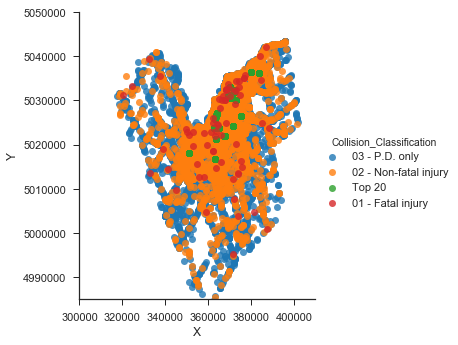

In [268]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

plt.figure.set_size_inches=(12,12)
# Create scatterplot of dataframe
sns.lmplot('X', # Horizontal axis
           'Y', # Vertical axis
           data=df_col_merge, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='Collision_Classification')

#overview of all intersections
plt.xlim(300000,410000)
plt.ylim(4985000,5050000)


In [21]:
df_col2014.Location.value_counts().nlargest(5)

ST. JOSEPH BLVD @ JEANNE D'ARC BLVD                           60
HIGHWAY 417 btwn HWY417 IC118 RAMP35 & HWY417 IC117 RAMP51    51
HIGHWAY 417 btwn HWY417 IC118 RAMP57 & HWY417 IC118 RAMP35    51
HIGHWAY 417 btwn HWY417 IC117 RAMP51 & HWY417 IC117 RAMP35    43
WEST HUNT CLUB RD @ WOODROFFE AVE                             42
Name: Location, dtype: int64

In [22]:
df_col2015.Location.value_counts().nlargest(5)

HUNT CLUB RD @ RIVERSIDE DR                  60
ST. JOSEPH BLVD @ JEANNE D'ARC BLVD          54
INNES RD @ TENTH LINE RD                     49
INDUSTRIAL AVE @ RIVERSIDE DR                39
ST. LAURENT BLVD @ COVENTRY RD/OGILVIE RD    38
Name: Location, dtype: int64

In [23]:
df_col2016.Location.value_counts().nlargest(5)

ST. JOSEPH BLVD @ JEANNE D'ARC BLVD                            59
HUNT CLUB RD @ RIVERSIDE DR                                    43
PRINCE OF WALES DR @ WEST HUNT CLUB RD                         36
HIGHWAY 417 btwn HWY417 IC122 RAMP61 & HWY417 IC121B RAMP16    35
WEST HUNT CLUB RD @ WOODROFFE AVE                              35
Name: Location, dtype: int64

In [76]:
df_col.Environment.value_counts().nlargest(3)

01 - Clear    34950
03 - Snow      4113
02 - Rain      3902
Name: Environment, dtype: int64

In [45]:
df_col['env_code'] = df_col.Environment.str.slice(0,2)
pd.factorize(df_col['env_code'])[0]
df_col['rdsurf_code'] = df_col.Road_Surface.str.slice(0,2)
pd.factorize(df_col['rdsurf_code'])[0]
df_col['tfctl_code'] = df_col.Traffic_Control.str.slice(0,2)
pd.factorize(df_col['tfctl_code'])[0]
df_col['colloc_code'] = df_col.Collision_Location.str.slice(0,2)
pd.factorize(df_col['colloc_code'])[0]
df_col['light_code'] = df_col.Light.str.slice(0,2)
pd.factorize(df_col['light_code'])[0]
df_col['colclass_code'] = df_col.Collision_Classification.str.slice(0,2)
pd.factorize(df_col['colclass_code'])[0]
df_col['imptyp_code'] = df_col.Impact_type.str.slice(0,2)
pd.factorize(df_col['imptyp_code'])[0]
df_col.colclass_code = df_col.colclass_code.replace({"03": "02"})

In [46]:
#correlation of values
df_col2 = df_col.filter(['env_code','rdsurf_code','tfctl_code','colloc_code','light_code','colclass_code','imptyp_code'], axis=1)

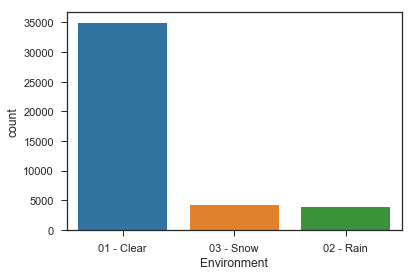

In [77]:
#df_col_env = df_col2[(df_col2.Environment == '01' | df_col2.Environment == '02' | df_col2.Environment == '03')]
df_col_env = df_col[df_col.Environment.isin(['01 - Clear', '02 - Rain', '03 - Snow'])]
sns.countplot(x='Environment',data=df_col_env)

In [38]:
df_col2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43944 entries, 0 to 43943
Data columns (total 7 columns):
env_code         43943 non-null object
rdsurf_code      43944 non-null object
tfctl_code       43920 non-null object
colloc_code      43938 non-null object
light_code       43942 non-null object
colclass_code    43944 non-null object
imptyp_code      43944 non-null object
dtypes: object(7)
memory usage: 2.3+ MB


In [48]:
df_col_corr = pd.get_dummies(df_col2)

In [50]:
x = df_col_corr.values

In [51]:
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

[[ 1.         -0.0704155  -0.01115082 ...,  0.02958466  0.0099006
   0.00222625]
 [-0.0704155   1.         -0.61536515 ...,  0.0331735  -0.10989014
   0.00544032]
 [-0.01115082 -0.61536515  1.         ..., -0.03644695  0.01363032
  -0.01451629]
 ..., 
 [ 0.02958466  0.0331735  -0.03644695 ...,  1.         -0.13063925
  -0.04785558]
 [ 0.0099006  -0.10989014  0.01363032 ..., -0.13063925  1.         -0.07237721]
 [ 0.00222625  0.00544032 -0.01451629 ..., -0.04785558 -0.07237721  1.        ]]


In [53]:
#crate dataframe with just fatal accidents to explore the variables related
df_col_fatal = df_col[(df_col.colclass_code == '01')]
df_col_fatal.head()

,Record,Location,X,Y,Date,Time,Environment,Road_Surface,Traffic_Control,Collision_Location,Light,Collision_Classification,Impact_type,env_code,rdsurf_code,tfctl_code,colloc_code,light_code,colclass_code,imptyp_code
1422,1423,BASELINE RD btwn ST. HELEN'S PL & CLYDE AVE,364135.77243,5.024748e+06,2016-10-30,19:06:00,01 - Clear,01 - Dry,10 - No control,04 - At/near private drive,07 - Dark,01 - Fatal injury,05 - Turning movement,01,01,10,04,07,01,05
1597,1598,BEAVERTAIL RD btwn OLD ALMONTE RD & RICHARDSON...,341477.04637,5.014417e+06,2016-03-23,18:33:00,01 - Clear,01 - Dry,10 - No control,01 - Non intersection,07 - Dark,01 - Fatal injury,07 - SMV other,01,01,10,01,07,01,07
2699,2700,CARLING AVE @ CARLINGWOOD SC,362072.91445,5.025918e+06,2016-01-11,10:00:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,01 - Fatal injury,07 - SMV other,01,01,01,03,01,01,07
3934,3935,CUMBERLAND ST btwn CLARENCE ST & YORK ST,368224.18585,5.032588e+06,2016-01-11,16:33:00,01 - Clear,01 - Dry,10 - No control,01 - Non intersection,01 - Daylight,01 - Fatal injury,04 - Sideswipe,01,01,10,01,01,01,04
4483,4484,EAGLESON RD @ FERNBANK RD,354797.97068,5.015587e+06,2016-10-30,17:35:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,01 - Fatal injury,05 - Turning movement,01,01,01,03,01,01,05


In [54]:
df_col_fatal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1422 to 28885
Data columns (total 20 columns):
Record                      71 non-null int64
Location                    71 non-null object
X                           71 non-null float64
Y                           71 non-null float64
Date                        71 non-null datetime64[ns]
Time                        71 non-null object
Environment                 71 non-null object
Road_Surface                71 non-null object
Traffic_Control             71 non-null object
Collision_Location          71 non-null object
Light                       71 non-null object
Collision_Classification    71 non-null object
Impact_type                 71 non-null object
env_code                    71 non-null object
rdsurf_code                 71 non-null object
tfctl_code                  71 non-null object
colloc_code                 71 non-null object
light_code                  71 non-null object
colclass_code               71 non-n

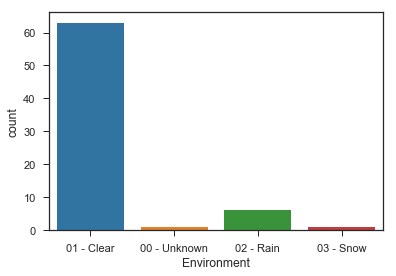

In [62]:
sns.countplot(x='Environment',data=df_col_fatal)

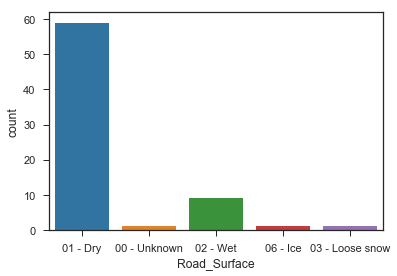

In [63]:
sns.countplot(x='Road_Surface',data=df_col_fatal)

In [58]:
df_col_fatal.Traffic_Control.value_counts().nlargest(5)

10 - No control        44
01 - Traffic signal    25
02 - Stop sign          2
Name: Traffic_Control, dtype: int64

In [59]:
df_col_fatal.Collision_Location.value_counts().nlargest(5)

01 - Non intersection         40
03 - At intersection          23
02 - Intersection related      4
04 - At/near private drive     3
06 - Underpass or tunnel       1
Name: Collision_Location, dtype: int64

In [60]:
df_col_fatal.Light.value_counts().nlargest(5)

01 - Daylight    40
07 - Dark        25
03 - Dawn         3
05 - Dusk         3
Name: Light, dtype: int64

In [61]:
df_col_fatal.Impact_type.value_counts().nlargest(5)

07 - SMV other           34
05 - Turning movement    10
01 - Approaching          7
02 - Angle                5
99 - Other                5
Name: Impact_type, dtype: int64